### Import Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from lib_file import lib_path
from sklearn.model_selection import train_test_split
from matplotlib import cm
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
plt.rcParams['font.size']=20

### Data Loading

In [3]:
df=pd.read_csv("input/Dataset.csv")
df=df[["State","Season","Crop","Area","Rainfall"]]
df.head()

,State,Season,Crop,Area,Rainfall
0,Andaman and Nicobar Islands,Kharif,Arecanut,1254.0,2763.2
1,Andaman and Nicobar Islands,Kharif,Other Kharif pulses,2.0,2763.2
2,Andaman and Nicobar Islands,Kharif,Rice,102.0,2763.2
3,Andaman and Nicobar Islands,Whole Year,Banana,176.0,2763.2
4,Andaman and Nicobar Islands,Whole Year,Cashewnut,720.0,2763.2


In [4]:
df.shape

(74975, 5)

In [5]:
df.isnull().sum()

State       0
Season      0
Crop        0
Area        0
Rainfall    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74975 entries, 0 to 74974
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   State     74975 non-null  object 
 1   Season    74975 non-null  object 
 2   Crop      74975 non-null  object 
 3   Area      74975 non-null  float64
 4   Rainfall  74975 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.9+ MB


### Removing outliers in Area feature

In [7]:
low_outliers = df["Area"].quantile(0.1)
high_outliers  = df["Area"].quantile(0.90)

df = df[(df["Area"] < high_outliers) & (df["Area"] > low_outliers)]
df = df.reset_index(drop=True)

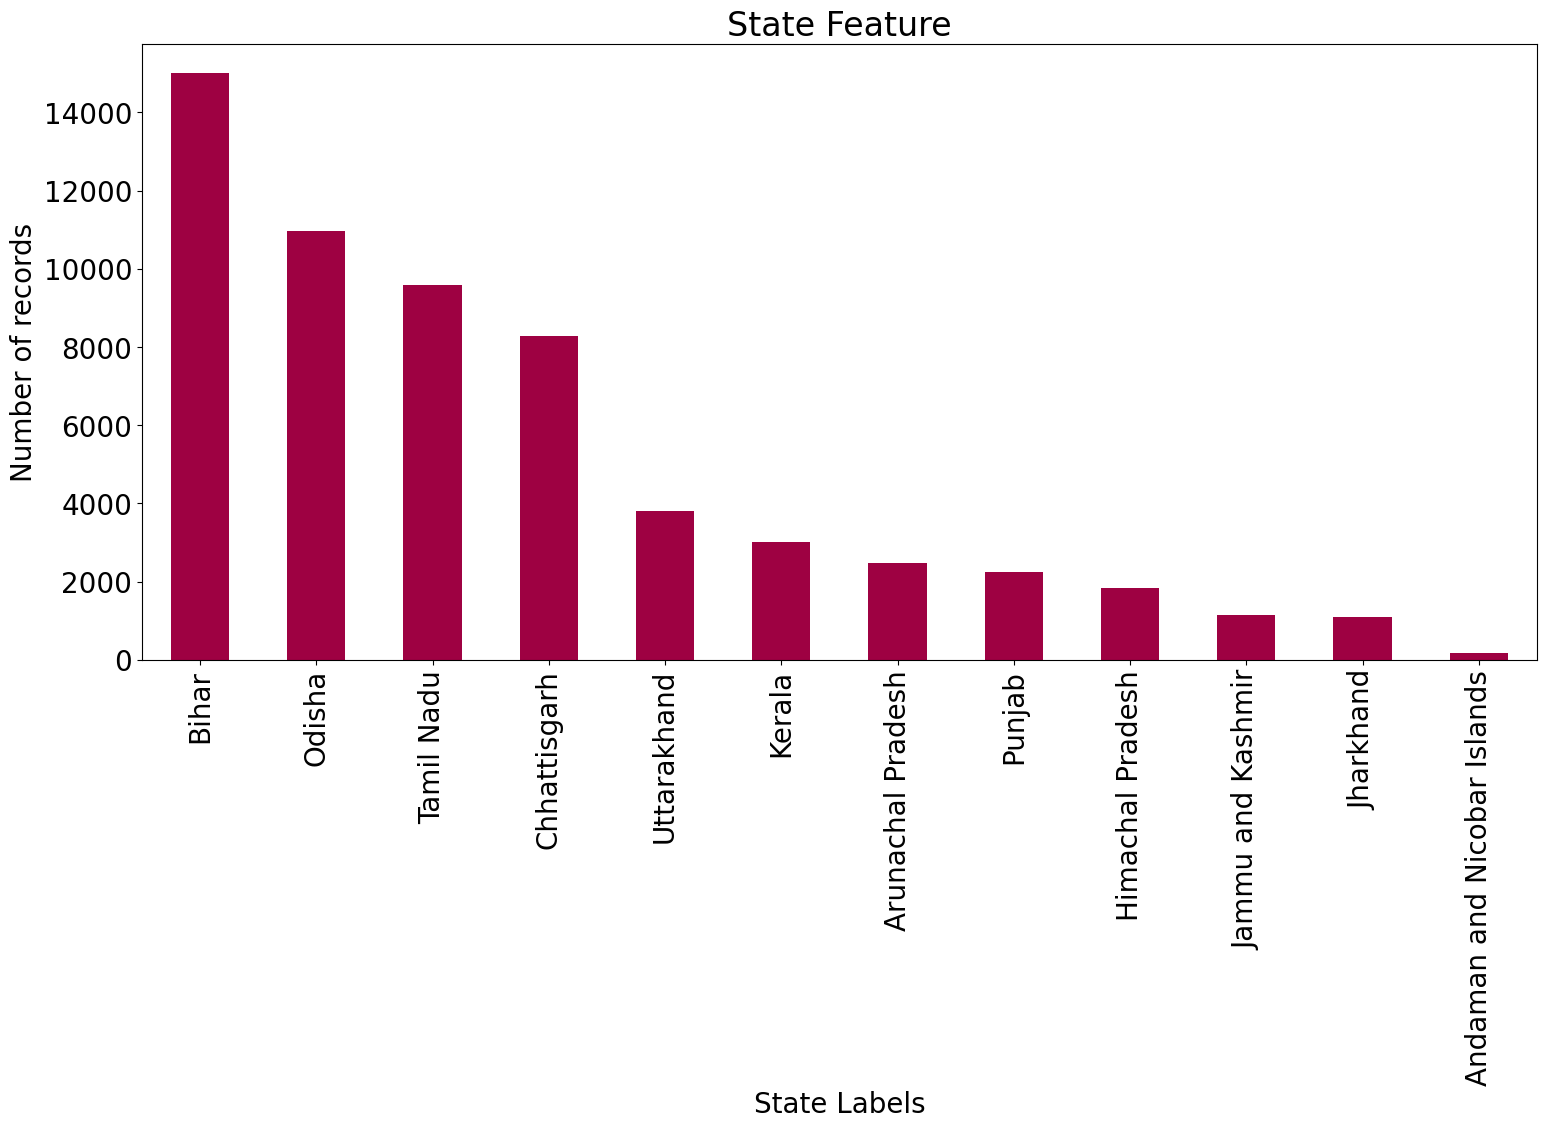

In [8]:
ax=df["State"].value_counts().plot.bar(figsize=(18,8),cmap = cm.get_cmap('Spectral'))
plt.title(label="State Feature")
plt.xlabel(xlabel='State Labels')
plt.ylabel(ylabel='Number of records')
plt.show()

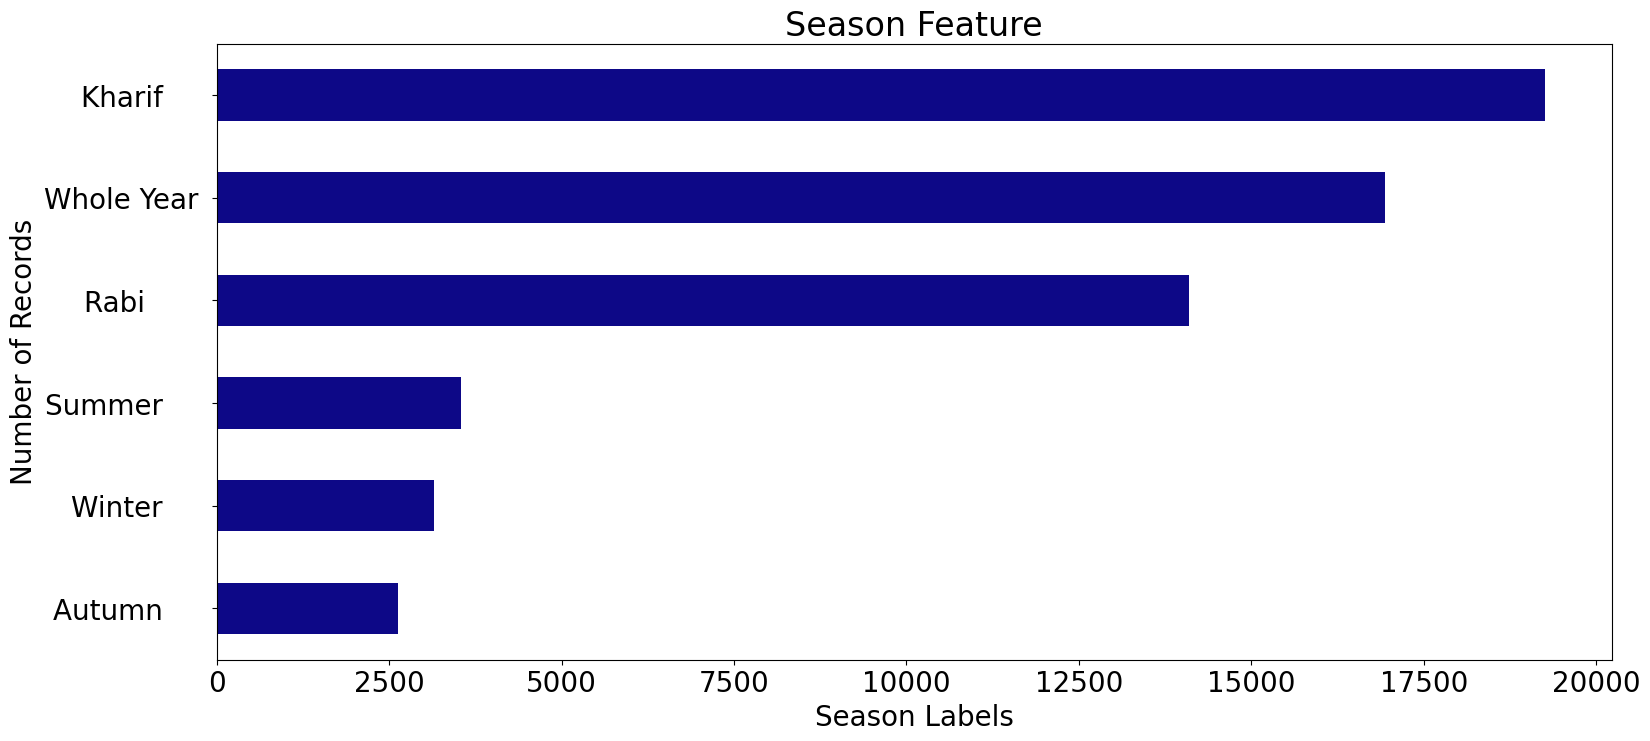

In [9]:
ax=df["Season"].value_counts(ascending=True).plot.barh(figsize=(18,8),cmap = cm.get_cmap('plasma'))
plt.title(label="Season Feature")
plt.xlabel(xlabel="Season Labels")
plt.ylabel(ylabel="Number of Records")
plt.show()

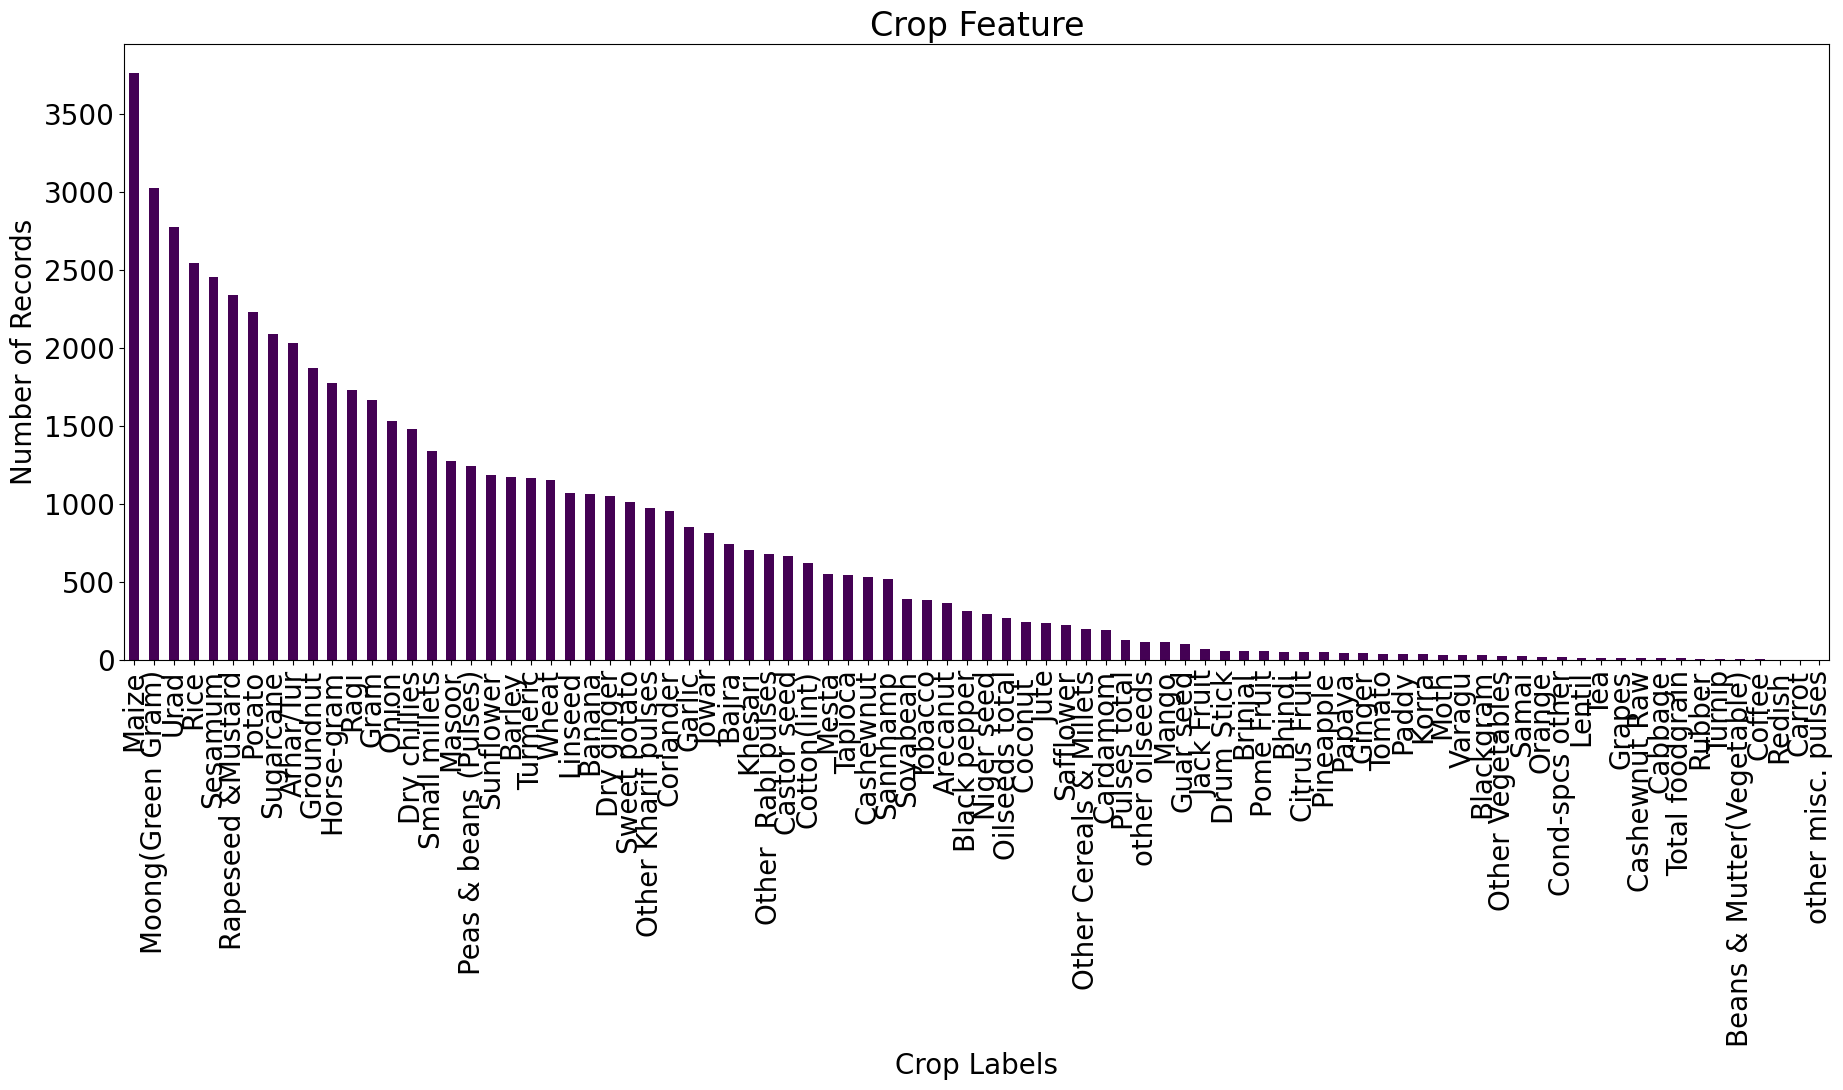

In [10]:
ax=df["Crop"].value_counts().plot.bar(figsize=(22,8),cmap = cm.get_cmap('viridis'))
plt.title(label="Crop Feature")
plt.xlabel(xlabel="Crop Labels")
plt.ylabel(ylabel="Number of Records")
plt.show()

### Label Encoding

In [11]:
df.head()

,State,Season,Crop,Area,Rainfall
0,Andaman and Nicobar Islands,Kharif,Arecanut,1254.0,2763.2
1,Andaman and Nicobar Islands,Kharif,Rice,102.0,2763.2
2,Andaman and Nicobar Islands,Whole Year,Banana,176.0,2763.2
3,Andaman and Nicobar Islands,Whole Year,Cashewnut,720.0,2763.2
4,Andaman and Nicobar Islands,Whole Year,Dry ginger,36.0,2763.2


In [12]:
df['Season'].unique()

array(['Kharif     ', 'Whole Year ', 'Autumn     ', 'Rabi       ',
       'Summer     ', 'Winter     '], dtype=object)

In [13]:
space_less_season={'Kharif     ':'Kharif','Whole Year ':'Whole Year','Rabi       ':'Rabi','Autumn     ':'Autumn','Summer     ':'Summer','Winter     ':'Winter'}
df['Season']=df['Season'].replace(space_less_season)

In [14]:
df['Season'].unique()

array(['Kharif', 'Whole Year', 'Autumn', 'Rabi', 'Summer', 'Winter'],
      dtype=object)

In [15]:
m = 1
list_crops=list(df['Crop'].unique())
crop_labels={}
for crop in list_crops:
    df['Crop'].replace(crop,m,inplace=True)
    crop_labels[crop]=m
    m+=1
import pickle
with open(file="model/crop_labels.pkl",mode="wb") as file:
    pickle.dump(obj=crop_labels,file=file)

In [16]:
m=1
list_seasons=list(df['Season'].unique())
season_labels={}
for season in list_seasons:
    df["Season"].replace(season,m,inplace=True)
    season_labels[season]=m
    m+=1
with open(file="model/season_labels.pkl",mode="wb") as file:
    pickle.dump(obj=season_labels,file=file)

In [17]:
m=1
list_states=list(df['State'].unique())
state_labels={}
for state in list_states:
    df["State"].replace(state,m,inplace=True)
    state_labels[state]=m
    m+=1
with open(file="model/state_labels.pkl",mode="wb") as file:
    pickle.dump(obj=state_labels,file=file)

In [18]:
df=df.sample(frac=1).reset_index(drop=True)
df.head()

,State,Season,Crop,Area,Rainfall
0,3,2,11,162.0,1303.7
1,9,5,17,108.0,1346.2
2,6,4,27,3988.0,1311.1
3,4,1,18,3390.0,1420.0
4,9,6,11,117.0,1538.9


### Clustering

In [19]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=42).fit(df)
df["label"]=kmeans.labels_

In [20]:
df.head()

,State,Season,Crop,Area,Rainfall,label
0,3,2,11,162.0,1303.7,1
1,9,5,17,108.0,1346.2,1
2,6,4,27,3988.0,1311.1,0
3,4,1,18,3390.0,1420.0,0
4,9,6,11,117.0,1538.9,1


In [21]:
df["label"].value_counts()

1    42159
0    10006
3     4779
2     2688
Name: label, dtype: int64

In [22]:
class_0=df.loc[df["label"]==0]
print("class 0 production meadian value",np.median(class_0["Area"]))

class 0 production meadian value 2509.5


In [23]:
class_1=df.loc[df["label"]==1]
print("class 1 production meadian value",np.median(class_1["Area"]))

class 1 production meadian value 203.0


In [24]:
class_2=df.loc[df["label"]==2]
print("class 2 production meadian value",np.median(class_2["Area"]))

class 2 production meadian value 11620.5


In [25]:
class_3=df.loc[df["label"]==3]
print("class 3 production meadian value",np.median(class_3["Area"]))

class 3 production meadian value 6142.77


In [26]:
class_names={0:"Poor",3:"Average",2:"Good",1:"Very Good"}

In [27]:
df=df.sample(frac=1).reset_index(drop=True)

In [28]:
X=df.drop(labels="label",axis=1)
y=df["label"]

In [29]:
X.head()

,State,Season,Crop,Area,Rainfall
0,11,2,14,213.0,1079.7
1,3,4,31,2292.0,1207.0
2,4,1,16,4573.0,1278.7
3,3,4,32,144.0,1069.9
4,9,6,24,98.0,1536.9


In [30]:
y.head()

0    1
1    0
2    3
3    1
4    1
Name: label, dtype: int32

### Data Splitting

In [31]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

### Model-1: KNeighborsClassifier

In [32]:
from sklearn.neighbors import KNeighborsClassifier
KNC_model=KNeighborsClassifier()
KNC_model.fit(X_train,y_train)

KNeighborsClassifier()

In [33]:
KNC_predictions=KNC_model.predict(X_test)

In [34]:
print(KNC_predictions)

[1 1 1 ... 1 1 1]


### Result Analysis

#### Accuracy Score

In [35]:
KNC_accuracy=accuracy_score(y_test,KNC_predictions)
print("KNeighborsClassifier model accuracy is {:.2f}%".format(KNC_accuracy*100.0))

KNeighborsClassifier model accuracy is 99.87%


#### Classification Report

In [36]:
print(classification_report(y_test,KNC_predictions,target_names=["Poor","Very Good","Good","Average"]))

              precision    recall  f1-score   support

        Poor       1.00      1.00      1.00      1984
   Very Good       1.00      1.00      1.00      8442
        Good       1.00      0.99      1.00       542
     Average       0.99      1.00      1.00       959

    accuracy                           1.00     11927
   macro avg       1.00      1.00      1.00     11927
weighted avg       1.00      1.00      1.00     11927



#### Confusion Matrix

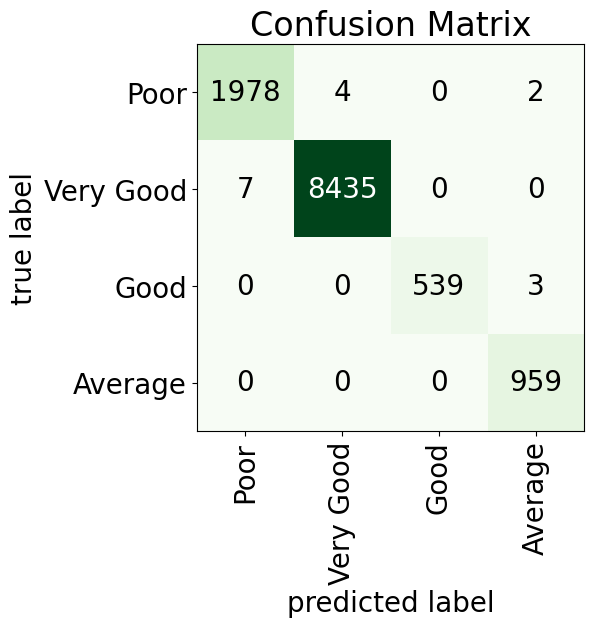

In [37]:
from mlxtend.plotting import plot_confusion_matrix
ax=plot_confusion_matrix(conf_mat=confusion_matrix(y_test,KNC_predictions),
                        class_names=["Poor","Very Good","Good","Average"],
                        figsize=(5,10),
                        cmap=plt.cm.Greens)
plt.title(label="Confusion Matrix")
plt.xticks(rotation=90)
plt.show()

### Model Saving

In [38]:
import pickle
with open(file="model/KNeighborsClassifier_model.pkl",mode="wb") as file:
    pickle.dump(obj=KNC_model,file=file)

### Model-2 RidgeClassifier

In [39]:
from sklearn.linear_model import RidgeClassifier
RC_model=RidgeClassifier(solver="lsqr")
RC_model.fit(X_train,y_train)

RidgeClassifier(solver='lsqr')

In [40]:
RC_pred=RC_model.predict(X_test)
print(RC_pred)

[1 1 1 ... 1 1 1]


### Result Analysis

***Accuracy Score***

In [41]:
RC_accuracy=accuracy_score(y_test,RC_pred)
print("RidgeClassifier model accuracy is {:.2f}%".format(RC_accuracy*100.0))

RidgeClassifier model accuracy is 75.64%


***Classification Report***

In [42]:
print(classification_report(y_test,RC_pred,target_names=["Poor","Very Good","Good","Average"]))

              precision    recall  f1-score   support

        Poor       0.00      0.00      0.00      1984
   Very Good       0.78      1.00      0.88      8442
        Good       0.49      1.00      0.66       542
     Average       1.00      0.04      0.08       959

    accuracy                           0.76     11927
   macro avg       0.57      0.51      0.40     11927
weighted avg       0.66      0.76      0.66     11927



***Confusion Matrix***

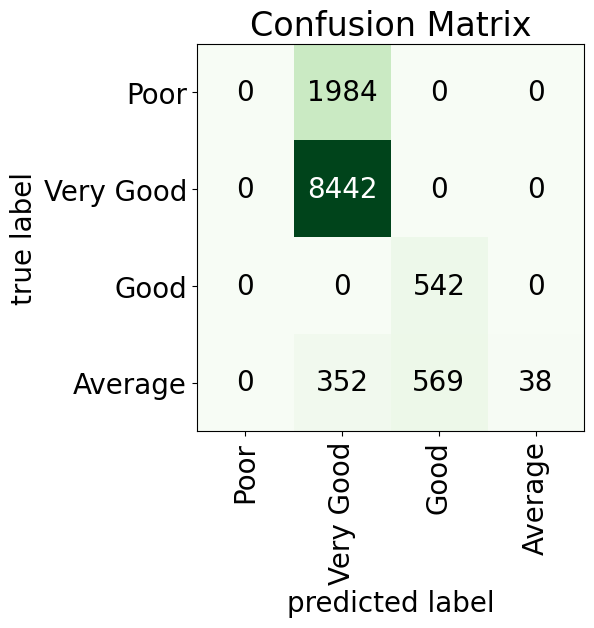

In [43]:
from mlxtend.plotting import plot_confusion_matrix
ax=plot_confusion_matrix(conf_mat=confusion_matrix(y_test,RC_pred),
                        class_names=["Poor","Very Good","Good","Average"],
                        figsize=(5,10),
                        cmap=plt.cm.Greens)
plt.title(label="Confusion Matrix")
plt.xticks(rotation=90)
plt.show()

***Model Saving***

In [44]:
import pickle
with open(file="model/RidgeClassifier_model.pkl",mode="wb") as file:
    pickle.dump(obj=RC_model,file=file)

----

In [45]:
data=df[["State","Season","Rainfall"]]
data.head()

,State,Season,Rainfall
0,11,2,1079.7
1,3,4,1207.0
2,4,1,1278.7
3,3,4,1069.9
4,9,6,1536.9


In [46]:
X=data[["State","Season"]]
y=data["Rainfall"]

In [47]:
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.2)
print(train_X.shape,test_X.shape,train_y.shape,test_y.shape)

(47705, 2) (11927, 2) (47705,) (11927,)


### Model

In [48]:
from sklearn.ensemble import RandomForestRegressor
RFR_model=RandomForestRegressor()
RFR_model.fit(train_X,train_y)

RandomForestRegressor()

In [49]:
RFR_pred=RFR_model.predict(test_X)
print(RFR_pred)

[1158.56916211 1037.20863073  902.54457322 ... 1146.44837151 1146.44837151
 1158.56916211]


In [50]:
res_df=pd.DataFrame()
res_df["True_values"]=test_y
res_df["Pred_values"]=RFR_pred
res_df=res_df.reset_index(drop=True)
res_df.head()

,True_values,Pred_values
0,1402.7,1158.569162
1,1023.5,1037.208631
2,318.0,902.544573
3,1348.2,1440.767210
4,1405.9,1451.098779


In [51]:
from sklearn.metrics import r2_score
print("R2_score is {:.2f}%".format(r2_score(test_y,RFR_pred)*100.0))

R2_score is 80.24%


Text(0.5, 0, 'Number of records')

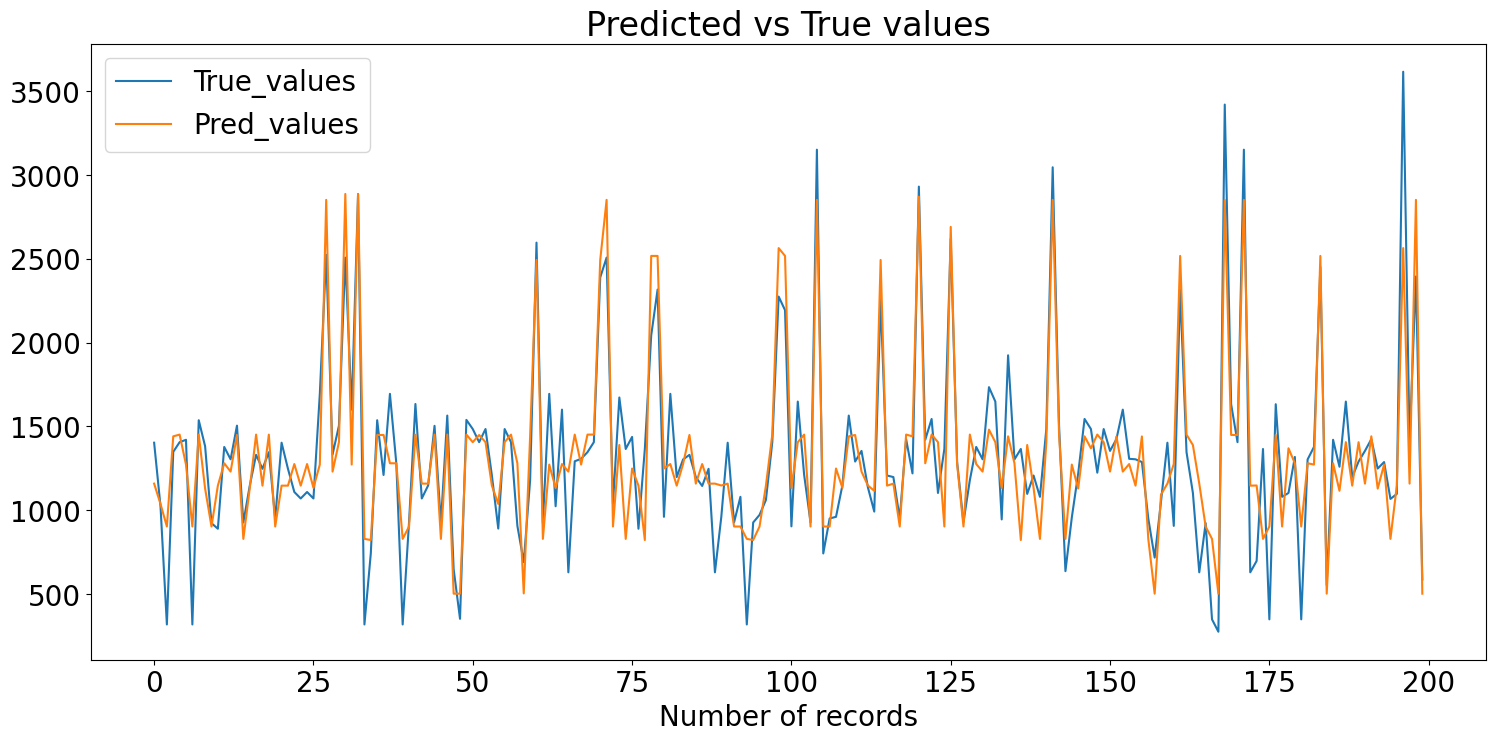

In [52]:
res_df.head(200).plot(figsize=(18,8))
plt.title(label="Predicted vs True values")
plt.xlabel(xlabel='Number of records')

In [53]:
import pickle
with open(file="model/RandomForestRegressor_model.pkl",mode="wb") as file:
    pickle.dump(obj=RFR_model,file=file)

## Thank You